### Question 1. Find a minimum of 10 transaction level features based on their relative importance that contribute to an address being classified good or bad.

### data cleanup

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
df = pd.read_excel("../datasets/Ethlas dataset/Assignment_TrainingData.xlsx")
df.head(10)

,focal_addr,focal_addr_type,blacklist,last_ts,tot_txn,tot_val,min_val,max_val,sd2_val,unq_other_addr,...,days_diff_first_last_sent,to_contract_txn,tot_val_to_contract,min_val_to_contract,max_val_to_contract,avg_val_to_contract,erc20_txn,sum_val_erc20,erc721_txn,sum_val_erc721
0,0x00000002de4e35b0838fe97e09bb26317c2e570c,contract address,0,2023-01-29 21:43:23,402,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,...,NaN,0,,,,,0,,0,
1,0x0000000506063a51c6ce59906d8c40f7d7fe92a7,wallet address,1,2023-02-15 15:53:59,16,1.843963e+19,0.000000e+00,1.800000e+19,1.892915e+37,13,...,153.244306,10,0,0,0,0,3,0,0,
2,0x0000098a312e1244f313f83cac319603a97f4582,wallet address,1,2023-02-08 12:19:59,8792,1.500201e+19,0.000000e+00,1.000000e+18,1.703185e+33,1486,...,103.834028,8493,0,0,0,0,1356,0,4225,0
3,0x000677bbab0fea85506f5f63806d331c9c2df1ac,wallet address,0,2022-08-21 09:26:43,1,7.287733e+14,7.287733e+14,7.287733e+14,0.000000e+00,1,...,0.000000,0,,,,,0,,0,
4,0x000f4432a40560bbff1b581a8b7aded8dab80026,wallet address,1,2023-02-15 01:53:11,247,4.243310e+19,0.000000e+00,8.200000e+18,5.954650e+35,91,...,179.527037,215,28801702000000000000,0,8200000000000000000,133961404651162000,30,10450000000000000000,17,550000000000000000
5,0x0013e1131707c692fb8093b2ca540bff4d8fde62,wallet address,0,2022-09-09 04:29:43,1,2.720863e+16,2.720863e+16,2.720863e+16,0.000000e+00,1,...,0.000000,0,,,,,0,,0,
6,0x002418dd34b76845aa272f34c13cdbeb5a23910c,wallet address,0,2022-10-31 01:21:47,1,3.308973e+16,3.308973e+16,3.308973e+16,0.000000e+00,1,...,0.000000,0,,,,,0,,0,
7,0x002bc2632ec91e229470e747534ca93da52bb266,contract address,1,2022-09-16 03:32:23,126,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19,...,NaN,0,,,,,0,,126,0
8,0x00304c84fd48f6812a3af19697ebda50c0967c99,wallet address,1,2023-02-08 23:16:47,6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5,...,179.815984,6,0,0,0,0,1,0,2,0
9,0x003cd9ad7c81a6e8de85007ce3aeebbc5170ff0e,wallet address,0,2022-12-26 11:07:11,58,4.574491e+17,0.000000e+00,2.500000e+17,1.454867e+33,6,...,63.746528,53,250000000000000000,0,250000000000000000,4716981132075470,40,250000000000000000,0,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   focal_addr                 6280 non-null   object        
 1   focal_addr_type            6280 non-null   object        
 2   blacklist                  6280 non-null   int64         
 3   last_ts                    6280 non-null   datetime64[ns]
 4   tot_txn                    6280 non-null   int64         
 5   tot_val                    6280 non-null   float64       
 6   min_val                    6280 non-null   float64       
 7   max_val                    6280 non-null   float64       
 8   sd2_val                    6280 non-null   float64       
 9   unq_other_addr             6280 non-null   int64         
 10  days_diff_first_last       6280 non-null   float64       
 11  contract_creation          6280 non-null   int64         
 12  recv_t

In [4]:
# basic imputation of NaN values
df.fillna(df.mean(), inplace=True)

C:\Users\Manish Seal\AppData\Local\Temp\ipykernel_13308\754884957.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
C:\Users\Manish Seal\AppData\Local\Temp\ipykernel_13308\754884957.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [5]:
# removing the non-transaction features (focal_addr included because it is a Unique Identifier)
df_feature_transactions = dffeature_transactions = df.drop(['last_ts', 'blacklist', 'days_diff_first_last', 'days_diff_first_last_recv','focal_addr'], axis=1)

In [6]:
df_label = df['blacklist']

In [7]:
df_label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6280 entries, 0 to 6279
Series name: blacklist
Non-Null Count  Dtype
--------------  -----
6280 non-null   int64
dtypes: int64(1)
memory usage: 49.2 KB


In [8]:
# further data cleanup
from sklearn.preprocessing import LabelEncoder

# create label encoder object
le = LabelEncoder()

# fit and transform the focal_addr_type column
df_feature_transactions['focal_addr_type'] = le.fit_transform(df_feature_transactions['focal_addr_type']) # converting focal_addr type to int32 as it may contain useful info

In [9]:
# dealing with the received, sent, total and sum transaction values
cols_to_convert = ['min_val_recv', 'max_val_recv', 'avg_val_recv', 'min_val_sent', 'max_val_sent', 'avg_val_sent', 'tot_val_to_contract',
                   'min_val_to_contract', 'max_val_to_contract', 'avg_val_to_contract', 'sum_val_erc20', 'sum_val_erc721']
df_feature_transactions[cols_to_convert] = df_feature_transactions[cols_to_convert].replace(
    '', 0)

df_feature_transactions[cols_to_convert] = df_feature_transactions[cols_to_convert].apply(
    pd.to_numeric)

In [10]:
df_feature_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   focal_addr_type            6280 non-null   int32  
 1   tot_txn                    6280 non-null   int64  
 2   tot_val                    6280 non-null   float64
 3   min_val                    6280 non-null   float64
 4   max_val                    6280 non-null   float64
 5   sd2_val                    6280 non-null   float64
 6   unq_other_addr             6280 non-null   int64  
 7   contract_creation          6280 non-null   int64  
 8   recv_txn                   6280 non-null   int64  
 9   tot_val_recv               6280 non-null   float64
 10  min_val_recv               6280 non-null   float64
 11  max_val_recv               6280 non-null   float64
 12  avg_val_recv               6280 non-null   float64
 13  sd2_val_recv               6280 non-null   float

In [11]:
# Set the options to display all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Summary stats
print(df_feature_transactions.describe())

       focal_addr_type       tot_txn       tot_val       min_val  \
count      6280.000000   6280.000000  6.280000e+03  6.280000e+03   
mean          0.954299     39.146975  1.062860e+20  5.211100e+18   
std           0.208852    328.487674  2.338778e+21  3.988168e+20   
min           0.000000      1.000000  0.000000e+00  0.000000e+00   
25%           1.000000      2.000000  5.066824e+15  0.000000e+00   
50%           1.000000      4.000000  9.823210e+16  0.000000e+00   
75%           1.000000     16.000000  1.259070e+18  4.318888e+15   
max           1.000000  15161.000000  1.105386e+23  3.160245e+22   

            max_val       sd2_val  unq_other_addr  contract_creation  \
count  6.280000e+03  6.280000e+03     6280.000000        6280.000000   
mean   5.632499e+19  7.763902e+40       15.290446          33.275478   
std    1.542066e+21  2.811700e+42      212.110479         323.504800   
min    0.000000e+00 -1.152922e+18        1.000000           0.000000   
25%    4.057856e+15  0.0000

for analysis purposes, we will need to use a min-max scaler to adust the columns with a high range

In [21]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Normalize the data
df_feature_transactions_scaled = pd.DataFrame(scaler.fit_transform(df_feature_transactions),columns=df_feature_transactions.columns)

In [22]:
df_feature_transactions_scaled.head()

,focal_addr_type,tot_txn,tot_val,min_val,max_val,sd2_val,unq_other_addr,contract_creation,recv_txn,tot_val_recv,min_val_recv,max_val_recv,avg_val_recv,sd2_val_recv,unq_from_addr,sent_txn,tot_val_sent,min_val_sent,max_val_sent,avg_val_sent,sd2_val_sent,unq_to_addr,days_diff_first_last_sent,to_contract_txn,tot_val_to_contract,min_val_to_contract,max_val_to_contract,avg_val_to_contract,erc20_txn,sum_val_erc20,erc721_txn,sum_val_erc721
0,-4.569632,1.104705,-0.045449,-0.013067,-0.036529,-0.027615,-0.067378,-0.102867,1.496356,-0.034421,-0.013643,-0.032415,-0.020909,-0.04637,-0.023275,-0.148262,-0.042165,-0.021731,-0.031588,-0.027551,0.000000,-0.245809,0.000000,-0.131762,-0.026014,-0.012749,-0.021011,-0.018269,-0.122159,-0.035772,-0.066812,-0.050646
1,0.218836,-0.070471,-0.037564,-0.013067,-0.024855,-0.027608,-0.010799,-0.053405,-0.038975,-0.034421,-0.013643,-0.032415,-0.020909,0.00000,-0.028085,-0.066299,-0.031414,-0.021731,-0.019175,-0.025014,-0.023423,0.087328,1.266572,-0.078002,-0.026014,-0.012749,-0.021011,-0.018269,-0.058186,-0.035772,-0.066812,-0.050646
2,0.218836,26.648032,-0.039034,-0.013067,-0.035880,-0.027615,6.934248,27.076637,0.025952,-0.019219,-0.013643,-0.031156,-0.018774,-0.04637,-0.013654,44.803733,-0.042164,-0.021731,-0.031587,-0.027551,-0.023429,37.757462,0.559852,45.526270,-0.026014,-0.012749,-0.021011,-0.018269,28.793414,-0.035772,53.910695,-0.050646
3,0.218836,-0.116138,-0.045448,-0.013066,-0.036528,-0.027615,-0.067378,-0.102867,-0.038975,-0.034421,-0.013643,-0.032415,-0.020909,0.00000,-0.028085,-0.143140,-0.042164,-0.021729,-0.031587,-0.027550,-0.023429,-0.220183,-0.925297,-0.131762,-0.026014,-0.012749,-0.021011,-0.018269,-0.122159,-0.035772,-0.066812,-0.050646
4,0.218836,0.632808,-0.027304,-0.013067,-0.031211,-0.027615,0.356963,0.660706,-0.038975,-0.034421,-0.013643,-0.032415,-0.020909,0.00000,-0.028085,1.117053,-0.017426,-0.021731,-0.025933,-0.027173,-0.023429,2.086152,1.642496,1.024070,-0.007169,-0.012749,-0.014881,-0.017972,0.517566,0.365531,0.150375,0.280183


### Feature selection

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier object
rfc = RandomForestClassifier(random_state=42)

# Fit the classifier on the scaled transaction level features and label data
rfc.fit(df_feature_transactions_scaled, df_label.values.ravel())

# Get the feature importances from the trained classifier
feature_importances = rfc.feature_importances_

# Get the column names of the scaled transaction level features
feature_names = df_feature_transactions_scaled.columns

# Create a dictionary of feature names and their corresponding importances
feature_importances_dict = dict(zip(feature_names, feature_importances))

# Sort the features by importance in descending order and select the top 10
top_features = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 features and their importances
print("{:<20} {}".format("Feature", "Score"))
print("-" * 30)
for feature, importance in top_features:
    print("{:<20} {:.2f}".format(feature, importance))

Feature              Score
------------------------------
contract_creation    0.50
erc20_txn            0.08
unq_to_addr          0.07
erc721_txn           0.04
unq_other_addr       0.04
sent_txn             0.04
tot_txn              0.03
to_contract_txn      0.02
min_val_recv         0.02
avg_val_recv         0.02


### Question 2. Given a new wallet address and its transaction history, output a prediction score whether the address is good or bad.

In [24]:
# using logistic regressions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define the new features to use for training the model
features = ['contract_creation', 'erc20_txn', 'unq_to_addr', 'erc721_txn', 'unq_other_addr', 'sent_txn', 'tot_txn', 'recv_txn', 'to_contract_txn', 'unq_from_addr']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_feature_transactions_scaled[features], df_label, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
score = model.score(X_test, y_test)
print(f"Validation Accuracy: {score}")

# get full classification report
y_pred = model.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.8280254777070064
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       775
           1       0.97      0.57      0.72       481

    accuracy                           0.83      1256
   macro avg       0.88      0.78      0.80      1256
weighted avg       0.86      0.83      0.82      1256



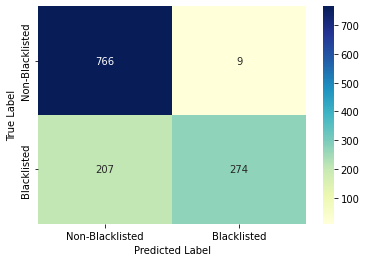

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=["Non-Blacklisted", "Blacklisted"], yticklabels=["Non-Blacklisted", "Blacklisted"])

# Set the axis labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show the plot
plt.show()

a high type 2 error can be observed where 440 of the non-blacklisted labels, were actually blacklisted (assuming blacklist outcome was postitive)

This may be due to the fact that there are 2302 bad addresses and 3978 good addresses. Thus, the model may be more biased to predict the non-blacklisted labels. Stratified sampling would be great to reduce these errors

### Prediction scores output:

In [26]:
# subsetting the data for 10 most important features
data_subset = df_feature_transactions_scaled[features]
predictions = model.predict_proba(data_subset)

In [27]:
# 0th index means probability of 0 label
# 1st index means probability of 1 label
predictions

array([[9.98696442e-01, 1.30355802e-03],
       [2.99474179e-01, 7.00525821e-01],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [2.05970346e-05, 9.99979403e-01],
       [8.33381513e-01, 1.66618487e-01],
       [7.55122094e-01, 2.44877906e-01]])

In [28]:
trustworthy_scores = pd.DataFrame({'Trustworthy Score': predictions[:, 0]})
trustworthy_scores = trustworthy_scores.round(2)
trustworthy_scores.head(10)

,Trustworthy Score
0,1.00
1,0.30
2,0.00
3,0.81
4,0.00
5,0.81
6,0.81
7,0.00
8,0.63
9,0.22


In [29]:
# Get the trustworthy scores dataframe
trustworthy_scores_df = trustworthy_scores

# Merge the trustworthy scores dataframe with the original dataframe
merged_df = pd.concat([df, trustworthy_scores_df], axis=1)

# Select only the relevant columns
result_df = merged_df[['focal_addr', 'focal_addr_type',
                       'Trustworthy Score', 'blacklist']]

In [30]:
# dataframe for focal addresses, trustworthy score, blacklists and expected blacklists
result_df['expected_blacklist'] = result_df['Trustworthy Score'].apply(lambda x: 0 if x > 0.5 else 1)
result_df.head()

C:\Users\Manish Seal\AppData\Local\Temp\ipykernel_13308\4238500627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['expected_blacklist'] = result_df['Trustworthy Score'].apply(lambda x: 0 if x > 0.5 else 1)


,focal_addr,focal_addr_type,Trustworthy Score,blacklist,expected_blacklist
0,0x00000002de4e35b0838fe97e09bb26317c2e570c,contract address,1.00,0,0
1,0x0000000506063a51c6ce59906d8c40f7d7fe92a7,wallet address,0.30,1,1
2,0x0000098a312e1244f313f83cac319603a97f4582,wallet address,0.00,1,1
3,0x000677bbab0fea85506f5f63806d331c9c2df1ac,wallet address,0.81,0,0
4,0x000f4432a40560bbff1b581a8b7aded8dab80026,wallet address,0.00,1,1


In [31]:
# Calculate accuracy
accuracy = sum(result_df['blacklist'] == result_df['expected_blacklist']) / len(result_df)

# Print accuracy
print('Total Accuracy:', accuracy)

Total Accuracy: 0.8434713375796178
